# Tableau-alike

Do you remember?
![Cat vs Sales Graph](https://raw.githubusercontent.com/Data-Viz-Labs/python-programmatic-dataviz-with-matplotlib/refs/heads/main/assets/tableau_CatVsSales.png)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

✋✋✋✋✋✋✋✋✋✋✋✋✋✋✋✋

BEFORE RUN THE NEXT CELL, please upload the dataset to files section or update the path

✋✋✋✋✋✋✋✋✋✋✋✋✋✋✋✋

In [2]:
# Read the Excel file
# Make sure the file 'Sample  Superstore.xls' is in your working directory
df = pd.read_excel('/content/Sample - Superstore.xls', sheet_name='Orders')

In [3]:
# Convert Order Date to datetime and extract year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# Group the data by Year and Category
sales_by_year_cat = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

In [4]:
# Prepare the data for plotting
categories = ['Furniture', 'Office Supplies', 'Technology']
years = sorted(sales_by_year_cat['Year'].unique())
x = np.arange(len(categories))
width = 0.2

In [5]:
# Set up the plot
plt.figure(figsize=(12, 6))
plt.style.use('classic')  # Using classic style instead of seaborn

# Colors for each year (using standard matplotlib colors)
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

<Figure size 1200x600 with 0 Axes>

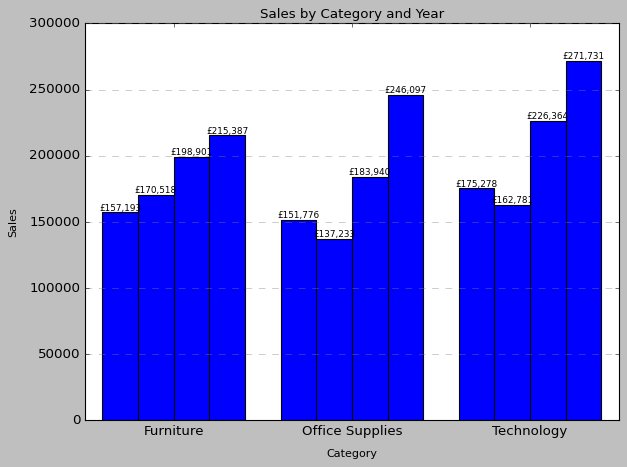

In [6]:
# Create bars for each year
for i, year in enumerate(years):
    year_data = sales_by_year_cat[sales_by_year_cat['Year'] == year]

    # Ensure data is in the same order as categories
    year_data = year_data.set_index('Category').reindex(categories).reset_index()

    # Calculate bar positions
    offset = width * (i - len(years)/2 + 0.5)

    # Create bars
    bars = plt.bar(x + offset,
                  year_data['Sales'],
                  width,
                  label=str(year),
                  color='blue')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.,
                height,
                f'£{height:,.0f}',
                ha='center',
                va='bottom',
                fontsize=8)

# Customize the plot
plt.xlabel('Category', fontsize=10, labelpad=10)
plt.ylabel('Sales', fontsize=10, labelpad=10)
plt.title('Sales by Category and Year', fontsize=12)

# Set x-axis ticks
plt.xticks(x, categories)

# Add grid with light gray color
plt.grid(True, linestyle='--', alpha=0.7, color='gray', axis='y')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Optional: Save the plot
# plt.savefig('superstore_sales.png', dpi=300, bbox_inches='tight')

## An now... try one of these:


![Challenge](https://raw.githubusercontent.com/Data-Viz-Labs/python-programmatic-dataviz-with-matplotlib/refs/heads/main/assets/tableau_Challenge.png)
